In [35]:
from minio import Minio
import pickle
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

local_file_path = './results/'
file_name = 'result_rounds_20_clients_12_selected_10_memory_256.pkl'
local = False # Set to true if you want to use the already existing pickle files and not download from Minio


def download_and_unpickle(bucket, object_name):
    #try:
    # Get object from the bucket
    response = client.get_object(bucket, object_name)
    
    # Read the object data into a BytesIO buffer
    data = BytesIO(response.data)


    # Save the buffer to a local .pkl file
    with open(os.path.join(local_file_path, object_name), 'wb') as file:
        file.write(data.read())
    
    # Load the local .pkl file
    with open(os.path.join(local_file_path, object_name), 'rb') as file:
        content = pickle.load(file)
        
    return content
    #except Exception as e:
        #print(f"An error occurred: {e}")

def just_unpickle(file_name):
    with open(os.path.join(local_file_path, file_name), 'rb') as file:
        content = pickle.load(file)
        
    return content


if local:
    just_unpickle(file_name)
else:
    # MinIO server details
    minio_url = 'localhost:9001'  # e.g., "play.min.io"
    
    access_key = 'minioadmin1'
    secret_key = access_key
    
    # Bucket and object details
    bucket_name = 'results-bucket'
    
    
    # Initialize the MinIO client
    client = Minio(minio_url,
                   access_key=access_key,
                   secret_key=secret_key,
                   secure=False)  # Set to False if MinIO server is not using SSL
    
    
    # Download and unpickle the .pkl file
    content = download_and_unpickle(bucket_name, file_name)

# Do something with the content
if content is not None:
    print("Content of the .pkl file:", content)


Content of the .pkl file: {'rounds': 20, 'clients': 12, 'selected': 10, 'accuracies': [0.927775, 0.94065, 0.9478, 0.952925, 0.9573, 0.96005, 0.962425, 0.964625, 0.96665, 0.967475, 0.9688, 0.96945, 0.97, 0.97125, 0.971525, 0.971925, 0.973125, 0.9739, 0.97465, 0.9752], 'train_accuracies': [[0.9679166666666666, 0.9704166666666667, 0.9754166666666667, 0.97375, 0.9704166666666667, 0.9708333333333333, 0.975, 0.97, 0.9725, 0.9679166666666666], [0.9883333333333333, 0.985, 0.9870833333333333, 0.9866666666666667, 0.9866666666666667, 0.9825, 0.98, 0.9866666666666667, 0.9841666666666666, 0.9870833333333333], [0.9870833333333333, 0.99125, 0.9883333333333333, 0.9908333333333333, 0.9929166666666667, 0.99125, 0.9908333333333333, 0.99, 0.9908333333333333, 0.9908333333333333], [0.9954166666666666, 0.9929166666666667, 0.9929166666666667, 0.99375, 0.9933333333333333, 0.9925, 0.9995833333333334, 0.9941666666666666, 0.9916666666666667, 0.9929166666666667], [0.9975, 0.9954166666666666, 0.99375, 0.995, 0.9933

In [36]:
rounds = content['rounds']
clients = content['clients']
selected = content['selected']
memory = content['memory']
train_round_durations = np.array(content['train_round_durations'])
train_accuracies = np.array(content['train_accuracies'])
test_accuracies = np.array(content['accuracies'])
training_time = content['training_time']
timed_out = content['timed_out']
activation_durations = np.array(content['activation_durations'])
best_accuracy = test_accuracies[-1]

In [37]:
results_names = [x.object_name for x in client.list_objects(bucket_name=bucket_name)]
#results_names

['result_rounds_10_clients_6_selected_4_memory_256.pkl',
 'result_rounds_20_clients_12_selected_10_memory_256.pkl',
 'result_rounds_20_clients_3_selected_3_memory_256.pkl',
 'result_rounds_20_clients_6_selected_4_memory_128.pkl',
 'result_rounds_20_clients_6_selected_4_memory_256.pkl',
 'result_rounds_20_clients_6_selected_4_memory_512.pkl',
 'result_rounds_20_clients_6_selected_6_memory_256.pkl',
 'result_rounds_50_clients_6_selected_4_memory_256.pkl']

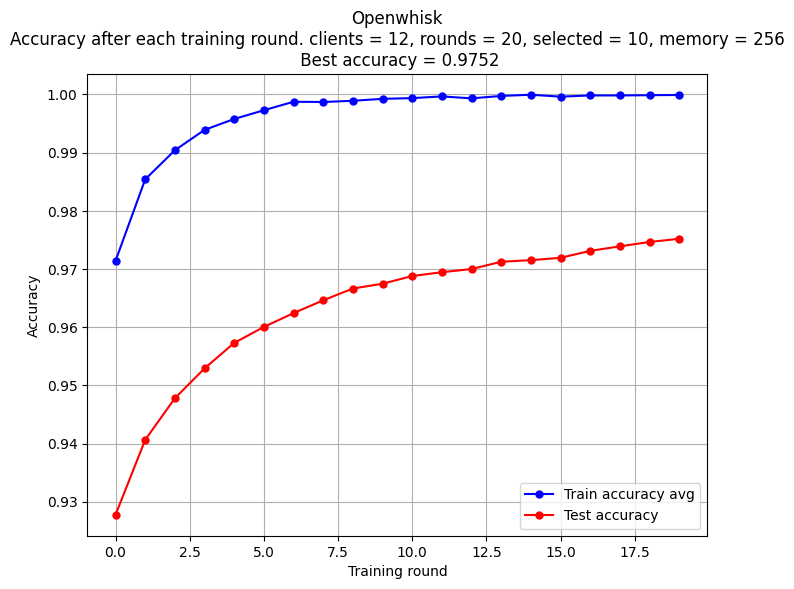

In [38]:
train_accuracies_means = train_accuracies.mean(axis=1) # calculating row wise mean

# Create sample data for two line plots
x = np.arange(len(train_accuracies))
y1 = train_accuracies_means
y2 = test_accuracies
# Create the first line plot with dots
plt.figure(figsize=(8, 6))

plt.plot(x, y1, label='Train accuracy avg', linestyle='-', marker='o', markersize=5, color='blue')

# Create the second line plot with dots
plt.plot(x, y2, label='Test accuracy', linestyle='-', marker='o', markersize=5, color='red')

# Add labels and a legend
plt.xlabel('Training round')
plt.ylabel('Accuracy')
plt.title(f'Openwhisk\nAccuracy after each training round. clients = {clients}, rounds = {rounds}, selected = {selected}, memory = {memory}\n Best accuracy = {test_accuracies.max() }')

plt.legend()

# Show the plot
plt.grid(True)
#plt.show()
plt.savefig(f'./plots/accuracies_c{clients}r{rounds}s{selected}m{memory}',dpi=300)

In [39]:
limit = clients * rounds

In [40]:
!python3 get-activations.py $limit

Limit is 240
Datetime            Activation ID                    Kind     Start Duration   Status  Entity
2024-01-28 09:10:16 13143d98daf14f4f943d98daf18f4fa4 blackbox warm  2.845s     success guest/learner:0.0.1
2024-01-28 09:10:16 3479f04a57ff44f8b9f04a57ffd4f80f blackbox warm  3.296s     success guest/learner:0.0.1
2024-01-28 09:10:16 5be16267c7da4fd0a16267c7da6fd0d9 blackbox warm  2.284s     success guest/learner:0.0.1
2024-01-28 09:10:11 538b4f3104074c988b4f3104079c98a2 blackbox warm  2.858s     success guest/learner:0.0.1
2024-01-28 09:10:11 d1cc609754ae43238c609754aec32391 blackbox warm  2.718s     success guest/learner:0.0.1
2024-01-28 09:10:11 b4c6749537434b0586749537436b05ea blackbox warm  1.888s     success guest/learner:0.0.1
2024-01-28 09:10:04 03d30c9ff5bb4287930c9ff5bb82877a blackbox warm  4.3s       success guest/learner:0.0.1
2024-01-28 09:10:04 8200693c66db45cb80693c66db25cb3d blackbox warm  3.993s     success guest/learner:0.0.1
2024-01-28 09:10:04 09b8341ad1d64a70b

In [41]:
df = pd.read_csv('activations.csv')

# Define a custom function to convert and standardize the duration values
def convert_duration(duration_str):
    if duration_str.endswith('ms'):
        return float(duration_str.rstrip('ms')) / 1000.0  # Convert milliseconds to seconds
    elif duration_str.endswith('s'):
        return float(duration_str.rstrip('s'))  # Leave seconds as they are
    else:
        raise ValueError("Invalid duration format")

avg_activation_durations_per_round = df['Duration'].apply(convert_duration).groupby(df.index // clients).mean().round(4) # average activation duration per round

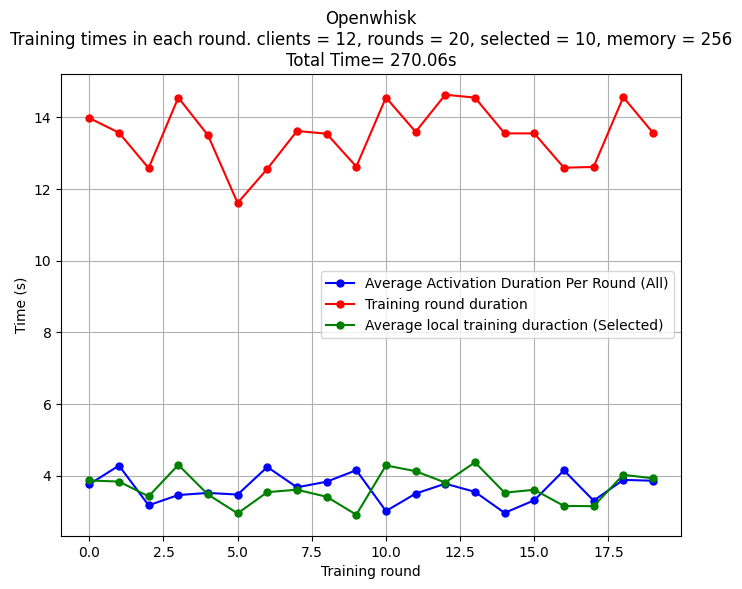

In [42]:
# Create sample data for two line plots
x = np.arange(len(train_accuracies))
y1 = avg_activation_durations_per_round
y2 = train_round_durations
y3 = activation_durations.mean(axis=1)
# Create the first line plot with dots
plt.figure(figsize=(8, 6))

plt.plot(x, y1, label='Average Activation Duration Per Round (All)', linestyle='-', marker='o', markersize=5, color='blue')

# Create the second line plot with dots
plt.plot(x, y2, label='Training round duration', linestyle='-', marker='o', markersize=5, color='red')

plt.plot(x, y3, label='Average local training duraction (Selected)', linestyle='-', marker='o', markersize=5, color='green')

# Add labels and a legend
plt.xlabel('Training round')
plt.ylabel('Time (s)')
plt.title(f'Openwhisk\nTraining times in each round. clients = {clients}, rounds = {rounds}, selected = {selected}, memory = {memory}\nTotal Time= {np.round(training_time, 2)}s')

plt.legend()

# Show the plot
plt.grid(True)
#plt.show()
plt.savefig(f'./plots/time_c{clients}r{rounds}s{selected}m{memory}',dpi=300)